<a href="https://colab.research.google.com/github/yhumadlaa/Exploratory-Data-Analysis_Pre-Processing-Data-and-Modelling/blob/main/ML_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir dataset
!unzip -qq /content/images.zip -d dataset
!ls dataset

images	labels


## **Exploratory Data Analysis (EDA)**

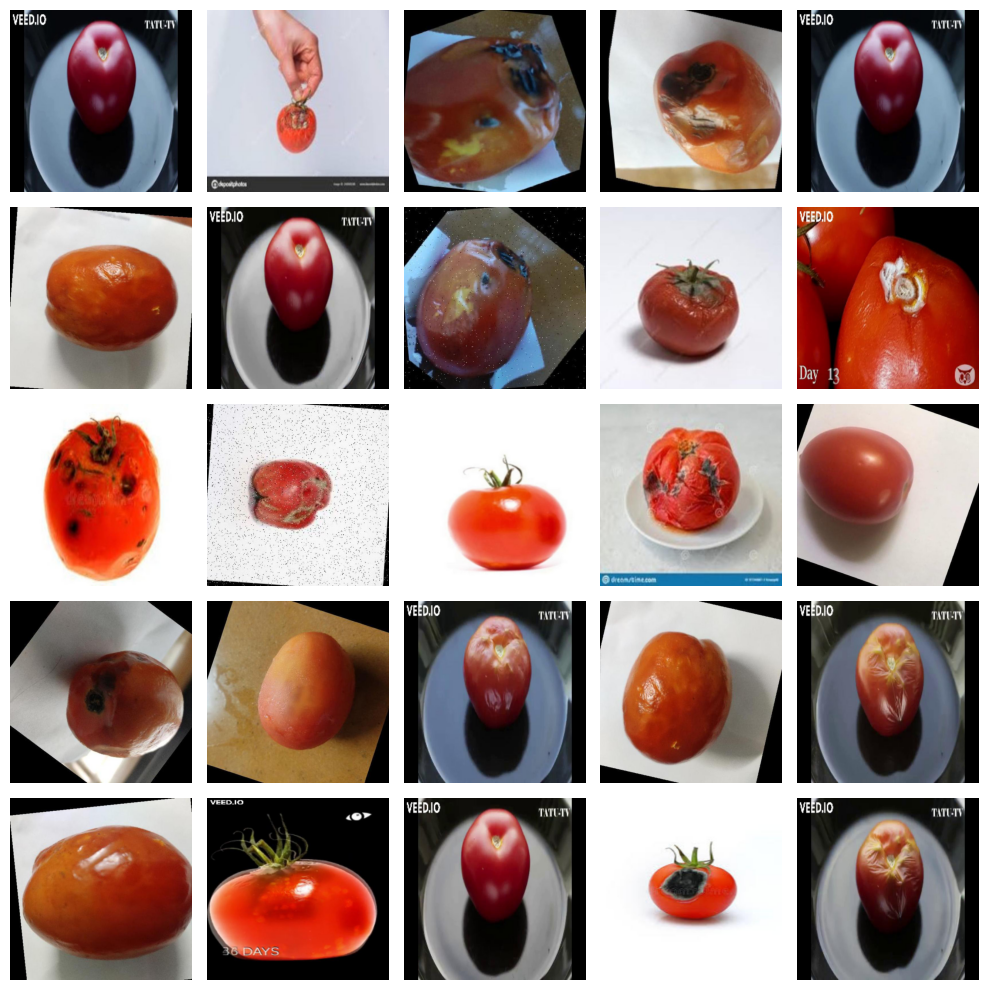

In [3]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import os

# Path folder gambar
folder_path = '/content/dataset/images/test'

# Mendapatkan daftar file gambar dalam folder
image_files = os.listdir(folder_path)

# Menentukan susunan grid
num_rows = 5
num_cols = 5

# Memastikan jumlah gambar tidak melebihi ukuran grid
num_images = min(len(image_files), num_rows * num_cols)

# Membuat subplot dengan ukuran dan susunan grid yang diinginkan
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Menampilkan gambar dalam grid
for i, ax in enumerate(axes.flat):
    if i < num_images:
        # Mengambil path file gambar
        image_path = os.path.join(folder_path, image_files[i])
        
        # Membaca dan menampilkan gambar
        image = plt.imread(image_path)
        ax.imshow(image)
    
    ax.axis('off')

# Menampilkan grid plot
plt.tight_layout()
plt.show()

In [4]:
from PIL import Image
import os

image_folder = "/content/dataset/images/train"  

image_files = os.listdir(image_folder)
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    
    try:
        image = Image.open(image_path)
        width, height = image.size
        print(f"Image {image_file}: Width={width}, Height={height}")
    except Exception as e:
        print(f"Error processing {image_file}: {str(e)}")

Image tomat_360_png.rf.6078b967b69aeb7b0e77dc786d37bbfd.jpg: Width=640, Height=640
Image tomato1_30-jpg_0_6740_jpg.rf.7f41a465100b89484f51a9413f6e5186.jpg: Width=640, Height=640
Image Copy-of-IMG_20200727_223213-jpg_0_9452_jpg.rf.1f730a84ed9de099d531c65c50ef1a83.jpg: Width=640, Height=640
Image IMG_20200725_095414-jpg_0_468_jpg.rf.911e356c8eaf550906326e8cbf9ee8b1.jpg: Width=640, Height=640
Image rotten_tomato-51-_jpg.rf.a1eb20a550bbaeb45470fabd04dd0aed.jpg: Width=640, Height=640
Image DSCN4068-jpg_0_9528_jpg.rf.fd4e8e148c766ba734f6c4838524f2ef.jpg: Width=640, Height=640
Image Copy-of-IMG_20200729_164231-jpg_0_3241_jpg.rf.ca14d38766777f17b93cf6bcf623611a.jpg: Width=640, Height=640
Image tomat_300_png.rf.843d0c8538a2c0a3ede6774e6b7a5f35.jpg: Width=640, Height=640
Image tomat_46_png.rf.ed9e94b39c87883e9ffcec2e63952c9e.jpg: Width=640, Height=640
Image rotten_tomato-22-_jpg.rf.b4a5e0bc28dc4a483655e8026046a64b.jpg: Width=640, Height=640
Image IMG_20200725_095414-jpg_0_457_jpg.rf.5930bf1f3dab

## **Image Augmentation**

In [5]:
import tensorflow as tf
import glob

# Path folder gambar
folder_path = '/content/dataset/images'

# Mencari semua file gambar dalam folder
image_paths = glob.glob(folder_path + '*.jpg')

# Fungsi untuk membaca dan memproses gambar
def load_and_preprocess_image(image_path):
    # Baca file gambar
    image = tf.io.read_file(image_path)
    # Decode file gambar menjadi tensor
    image = tf.image.decode_jpeg(image, channels=3)
    # Resize gambar menjadi ukuran yang diinginkan
    image = tf.image.resize(image, [224, 224])
    # Augmentasi data pada gambar
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    # Normalisasi nilai piksel gambar ke rentang [0, 1]
    image = image / 255.0
    
    return image

# List untuk menyimpan gambar yang telah diproses
processed_images = []

## **Modelling**

In [6]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/107.7 GB disk)


In [9]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 224 --batch 2 --epochs 10 --data bisadong.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=bisadong.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=2, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0